We need to have make sure you have data set "community_first_ever_contribution.csv" first to run this file

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ecosystem
maven       1155
npm         1010
pypi         619
rubygems     144
dtype: int64 ecosystem
maven       10760
npm         11588
pypi         6725
rubygems     2678
dtype: int64
ecosystem
maven       10.734201
npm          8.715913
pypi         9.204461
rubygems     5.377147
dtype: float64


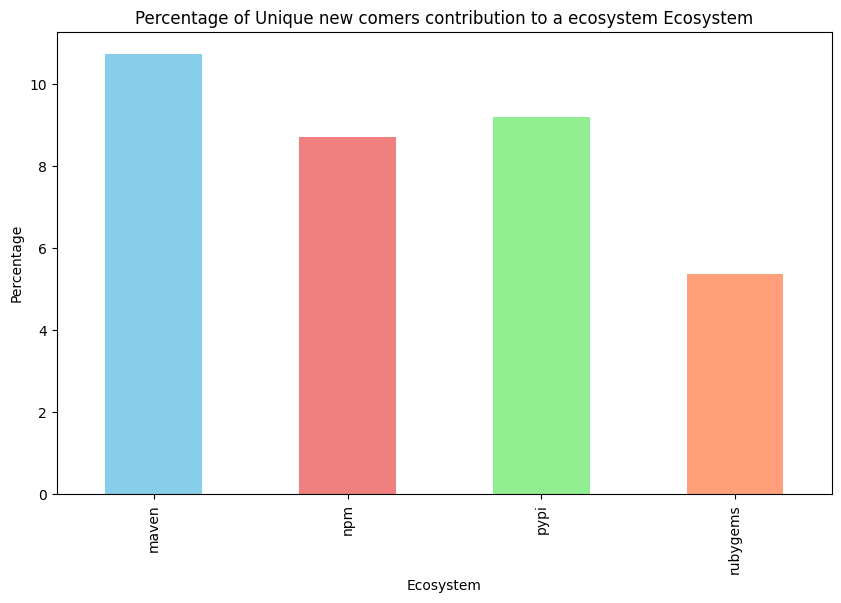

       total_count
count       2928.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0


In [26]:
# Read the CSV file
first_ever_df = pd.read_csv('community_first_ever_contribution.csv')

# Filter out rows where 'Bot' or 'bot' is not present in the 'userlogin' column
filtered_df = first_ever_df[~first_ever_df['userlogin'].str.contains('Bot|bot', case=False)]

# Filter further to get rows where 'total_count' is 0
filtered_df_with_zero_past_pr = filtered_df[filtered_df['total_count'] == 0]


# Calculate the percentage by ecosystem
percentage_by_ecosystem = (filtered_df_with_zero_past_pr.groupby('ecosystem').size() / filtered_df.groupby('ecosystem').size()) * 100

print(filtered_df_with_zero_past_pr.groupby('ecosystem').size(), filtered_df.groupby('ecosystem').size())
print(percentage_by_ecosystem)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']
plt.figure(figsize=(10, 6))
percentage_by_ecosystem.plot(kind='bar', color=colors)
plt.title('Percentage of Unique new comers contribution to a ecosystem Ecosystem')
plt.xlabel('Ecosystem')
plt.ylabel('Percentage')
plt.show()

print(filtered_df_with_zero_past_pr.describe())

# 2. Find out the stats around first timer

In [36]:
# 
#  MAIN DATASET 
#
df = pd.read_csv('community_engagement_records.csv')
df = df[~df['userlogin'].str.contains('Bot|bot', case=False)]
main_df = df[~df['author_association'].isin(["COLLABORATOR", "MEMBER", "OWNER"])]
print(main_df.describe())



                 id         number
count  2.845810e+05  284581.000000
mean   1.343038e+09   32142.655128
std    1.397502e+08   24181.117109
min    1.107273e+09       1.000000
25%    1.228588e+09    9059.000000
50%    1.333892e+09   29782.000000
75%    1.467604e+09   49640.000000
max    1.583946e+09  101699.000000


In [28]:
# 
#  FIRST EVER CONTRIBUTION
#
first_ever_df = pd.read_csv('community_first_ever_contribution.csv')
filtered_df = first_ever_df[~first_ever_df['userlogin'].str.contains('Bot|bot', case=False)]
newcomer_df = filtered_df[filtered_df['total_count'] == 0]

print(newcomer_df.describe())

       total_count
count       2928.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0


In [37]:
#Merge 

merged_df = pd.merge(newcomer_df, main_df[['Name', 'userlogin']], on='userlogin', how='left')
merged_df.describe()

,total_count
count,6942.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [35]:

merged_df = merged_df[merged_df['total_count'] == 0]

merged_df.head()
# result_df = merged_df.groupby(['ecosystem', 'modified_userlogin']).size().reset_index(name='count')

# # Display the resulting dataframe
# result_df = result_df.sort_values(by='count', ascending=False)

# print(result_df)

,userlogin,created_at,havePr,total_count,ecosystem
0,seokgoon28,2023-11-01T22:25:23Z,True,0,maven
1,ashlynselena,2023-11-01T19:19:19Z,True,0,pypi
2,crooruhe,2023-11-01T16:58:10Z,True,0,npm
3,hui730,2023-11-01T13:47:52Z,True,0,maven
4,kletse,2023-11-01T12:59:44Z,True,0,npm


In [ ]:
merged_df.groupby('modified_userlogin').size()


modified_userlogin
@angular-devkit/core-npm-Barresider           1
@angular-devkit/core-npm-kashyapGit1          1
@angular-devkit/core-npm-zdev90               1
@angular-devkit/schematics-npm-Barresider     1
@angular-devkit/schematics-npm-kashyapGit1    1
                                             ..
zone.js-npm-threebb100                        1
zone.js-npm-tpeiris6                          1
zone.js-npm-tpischke                          1
zone.js-npm-x00167885                         1
zone.js-npm-zviadadze1                        1
Length: 6941, dtype: int64